# Context

In this exercise, we will use the income-expenditure dataset(Inc_Exp_Data.csv) to obtain various descriptive statistical summary of the households. The income-expenditure dataset contains the income expenditure of the individuals having a family.

# Data Description

The income-expenditure dataset contains 7 attributes of 50 individuals.

1. **Mthly_HH_Income** - Monthly Household Income
2. **Mthly_HH_Expense** - Monthly Household Expense
3.	**No_of_Fly_Members** - Number of Family Members
4.	**Emi_or_Rent_Amt** - Monthly EMI or Rent Amount
5.	**Annual_HH_Income** - Annual Household Income
6.	**Highest_Qualified_Member** - Education Level of the Highest Qualified Member in the household
7.	**No_of_Earning_Members** - Number of Earning Members

# 1.Import necessary packages

In [66]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc = {'figure.figsize':(12,8)})

# 2.Load the file

In [67]:
data = pd.read_csv('Inc_Exp_Data.csv')

# 3.Analyze the data (Statistical Summary)

In [68]:
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [69]:
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.00,50.00,50.00,50.00,50.00,50.00
mean,"41,558.00","18,818.00",4.06,"3,060.00","490,019.04",1.46
std,"26,097.91","12,090.22",1.52,"6,241.43","320,135.79",0.73
min,"5,000.00","2,000.00",1.00,0.00,"64,200.00",1.00
25%,"23,550.00","10,000.00",3.00,0.00,"258,750.00",1.00
50%,"35,000.00","15,500.00",4.00,0.00,"447,420.00",1.00
75%,"50,375.00","25,000.00",5.00,"3,500.00","594,720.00",2.00
max,"100,000.00","50,000.00",7.00,"35,000.00","1,404,000.00",4.00


# 4.What is the Mean Expense of a Household?

In [70]:
data['Mthly_HH_Expense'].mean()

18818.0

# 5.What is the Median Household Expense?

In [71]:
data['Mthly_HH_Expense'].median()

15500.0

# 6.What is the Monthly Expense for most of the Households?

In [72]:
mth_exp_tmp = pd.crosstab(index=data["Mthly_HH_Expense"], columns="count")
mth_exp_tmp.reset_index(inplace=True)
mth_exp_tmp[mth_exp_tmp['count'] == data['Mthly_HH_Expense'].value_counts().max()]

col_0,Mthly_HH_Expense,count
18,25000,8


In [73]:
Most_Mthly_Expense = data['Mthly_HH_Expense'].mode().to_numpy()[0]
print(Most_Mthly_Expense, data['Mthly_HH_Expense'].value_counts().to_dict()[Most_Mthly_Expense])

25000 8


# 7.Plot the Histogram to count the Highest qualified member

Text(0.5, 0, 'Highest Qualified Member')

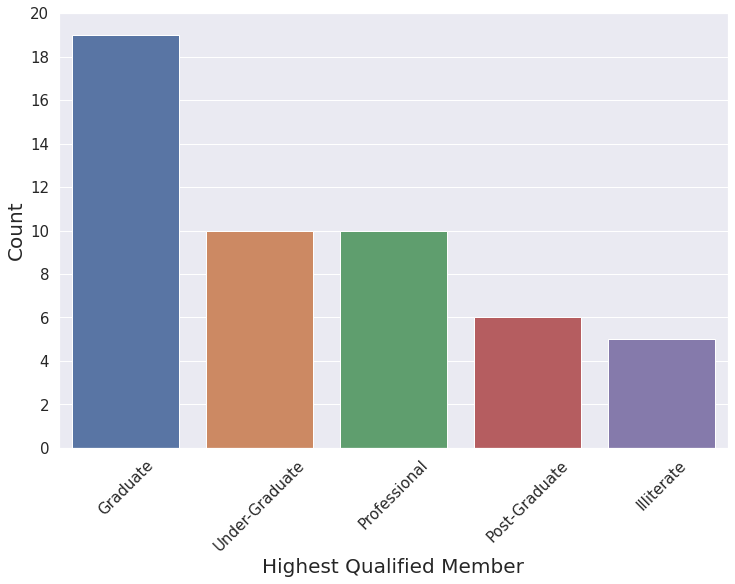

In [92]:
p = sns.countplot(x='Highest_Qualified_Member', 
                  data=data, 
                  order = data['Highest_Qualified_Member'].value_counts().index)
p.tick_params(axis='x', labelrotation=45, labelsize=15)
p.tick_params(axis='y', labelsize=15)
p.set_ylabel('Count', fontsize=20)
p.set_yticks(np.arange(0, data['Highest_Qualified_Member'].value_counts().max()+2,2))
p.set_xlabel('Highest Qualified Member', fontsize=20)

# 8.Calculate IQR(difference between 75% and 25% quartile) for Monthly Household Income and Expense

In [96]:
MHI_IQR = data['Mthly_HH_Income'].quantile(0.75) - data['Mthly_HH_Income'].quantile(0.25)
MHE_IQR = data['Mthly_HH_Expense'].quantile(0.75)- data['Mthly_HH_Expense'].quantile(0.25)
print('Mean household income IQR = ',MHI_IQR)
print('Mean household expense IQR = ',MHE_IQR)

Mean household income IQR =  26825.0
Mean household expense IQR =  15000.0


# 9.Calculate Standard Deviation for first 4 columns.

In [109]:
data[data.columns[:4]].std().to_frame().T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt
0,"26,097.91","12,090.22",1.52,"6,241.43"


# 10.Calculate Variance for first 3 columns.

In [110]:
data[data.columns[:3]].var().to_frame().T

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members
0,"681,100,853.06","146,173,342.86",2.30


# 11.Calculate the count of Highest qualified member.

In [102]:
data['Highest_Qualified_Member'].value_counts().to_frame().T

,Graduate,Under-Graduate,Professional,Post-Graduate,Illiterate
Highest_Qualified_Member,19,10,10,6,5


# 12.Plot the Histogram to count the No_of_Earning_Members

Text(0.5, 0, '# of Earning Members')

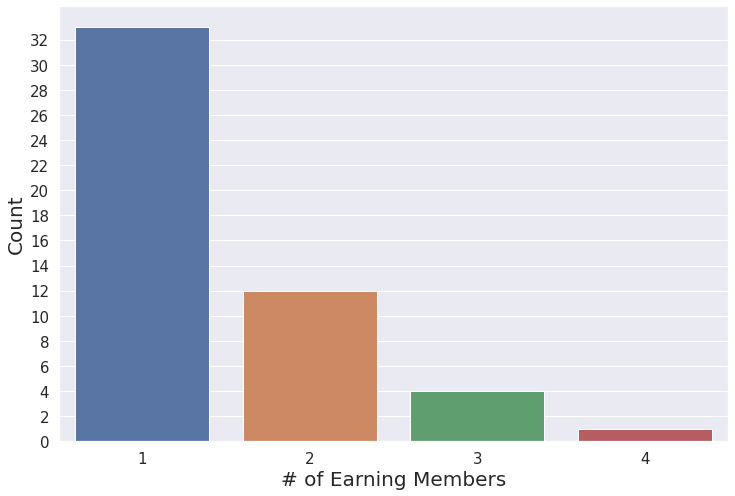

In [99]:
p = sns.countplot(x='No_of_Earning_Members', 
                  data=data, 
                  order = data['No_of_Earning_Members'].value_counts().index)
p.tick_params(axis='x', labelsize=15)
p.tick_params(axis='y', labelsize=15)
p.set_ylabel('Count', fontsize=20)
p.set_yticks(np.arange(0, data['No_of_Earning_Members'].value_counts().max(),2))
p.set_xlabel('# of Earning Members', fontsize=20)